# MNIST Case Study

### Context 

 
The MNIST database of handwritten digits,  has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

### Objective

To build a image digit classifier using deep learning techniques which will classify digit images.

### Data Description

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the [MNIST homepage](http://yann.lecun.com/exdb/mnist/).

### Importing Necessary Libraries

In [ ]:
# !pip install tensorflow-gpu

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Loading MNIST dataset

In [2]:
objects = tf.keras.datasets.mnist

### Getting Training and Test dataset

In [3]:
(X_train, y_train), (X_test,y_test)= objects.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Checking Shape

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Viewing Different digit images

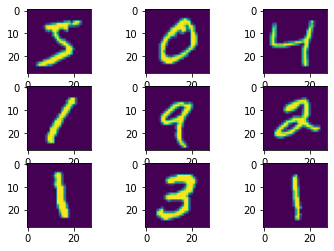

In [11]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i])

### Checking values of training set

In [12]:
print(X_train.shape)
print(X_train[0])

(60000, 28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0

### Scaling Training and Test dataset

In [13]:
X_train  = X_train / 255.0
X_test = X_test / 255.0

### Creating Model

In [14]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation='softmax')])

### Compiling Model

In [15]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training dataset

In [29]:
r = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3012 - accuracy: 0.9134
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2894 - accuracy: 0.9167
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2791 - accuracy: 0.9197
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2699 - accuracy: 0.9219
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2613 - accuracy: 0.9248


Accuracy on Training dataset is 91%

### Checking Performance on Test dataset

In [30]:
print(model.evaluate(X_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.2558 - accuracy: 0.9261
[0.25576332211494446, 0.9261000156402588]


Accuracy on Test dataset is 92%

### Predicting on single input

7


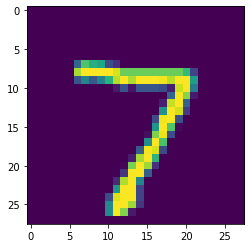

In [22]:
plt.imshow(X_test[0])
prediction=model.predict(X_test)
print(np.argmax(prediction[0]))

In [26]:
y_predicted = [np.argmax(i) for i in prediction]
y_predicted[:5]

[7, 2, 1, 0, 4]

### Creating confusion matrix

In [31]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    3,    1,    0,    4,   10,    1,    2,    0],
       [   0, 1108,    3,    2,    0,    3,    4,    1,   14,    0],
       [  12,    5,  927,   17,   13,    2,   15,   10,   27,    4],
       [   3,    1,   23,  921,    0,   28,    2,   13,   13,    6],
       [   2,    5,    5,    1,  912,    1,   14,    2,    4,   36],
       [  12,    3,    6,   41,   10,  768,   17,    6,   22,    7],
       [  16,    3,    6,    1,    9,   15,  906,    1,    1,    0],
       [   5,   11,   29,    6,    8,    0,    0,  928,    3,   38],
       [  12,    6,   12,   37,   12,   41,   13,    7,  816,   18],
       [  15,    7,    2,   14,   39,   10,    0,   18,    3,  901]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

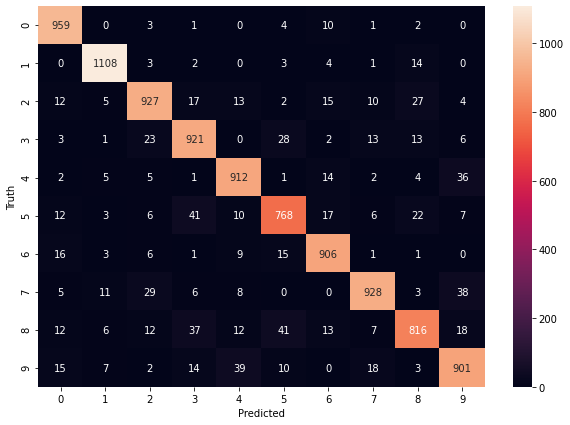

In [32]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Plotting loss and accuracy graph

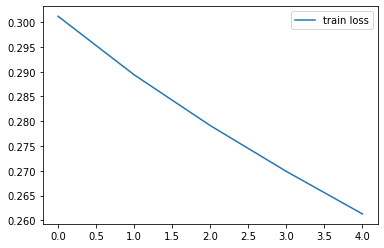

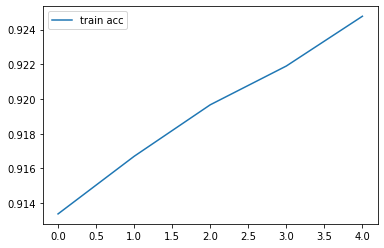

<Figure size 432x288 with 0 Axes>

In [33]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')